## Part 1 - Prepocessing real world data from citypopulation.de showing the population of the Dutch municipalities in 2021

<b>Municipality population data</b>

Data set URL: http://www.citypopulation.de/php/netherlands-admin.php

<b>Import necessary libraries</b>

In [1]:
import numpy as np 

import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json 
import geocoder
from geopy.geocoders import Nominatim 

import requests 

import matplotlib.colors as colors
import matplotlib.pyplot as plt

from bs4 import BeautifulSoup

import re
from functools import reduce

print('Libraries imported.')

Libraries imported.


<b>Defining Foursquare Credentials and Version</b>

In [2]:
CLIENT_ID = '10GTYZCZW3GIIJJ4QUGBRRMDM4YF3X5YCXHTMQ2MU3OBWTGI' # your Foursquare ID
CLIENT_SECRET = 'MCIKTZ0SUMMGJLX10XVEIR5DSMVCJCDI1OWT0GQJUJVPZ13B' # your Foursquare Secret
VERSION = '20210101' 
LIMIT = 100 

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 10GTYZCZW3GIIJJ4QUGBRRMDM4YF3X5YCXHTMQ2MU3OBWTGI
CLIENT_SECRET:MCIKTZ0SUMMGJLX10XVEIR5DSMVCJCDI1OWT0GQJUJVPZ13B


<b>Extracting population of Dutch municipalities data</b>

In [3]:
myList=list()
res = requests.get("http://www.citypopulation.de/php/netherlands-admin.php")         


soup = BeautifulSoup(res.text, 'lxml') 
table = soup.find("table", class_="data")

for items in table.find_all("tr")[:-1]:
    data = [' '.join(item.text.split()) for item in items.find_all(['th','td'])]
    myList.append(data)


<b>Put into a frame</b>

In [4]:
ata_transposed = zip(*myList)
df = pd.DataFrame(myList, columns=['Municipality', 'Native', 'Status', 'Population1991', 'Population2001', 'Population2011', 'Population2021', 'tot'])
df.head()

,Municipality,Native,Status,Population1991,Population2001,Population2011,Population2021,tot
0,Name,Status,PopulationCensus2001-01-01,PopulationEstimate2008-01-01,PopulationEstimate2011-01-01,PopulationEstimate2015-01-01,PopulationEstimate2021-01-01,
1,Drenthe,Province,"474,497","488,135","491,411","488,576","494,760",→
2,Aa en Hunze,Municipality,"25,208","25,598","25,785","25,203","25,392",→
3,Assen,Municipality,"59,005","65,487","67,177","67,165","68,833",→
4,Borger-Odoorn,Municipality,"26,298","26,201","25,941","25,502","25,596",→


<b>Get rid of the frist column</b>

In [5]:
df = df.iloc[1:]
df.head()

,Municipality,Native,Status,Population1991,Population2001,Population2011,Population2021,tot
1,Drenthe,Province,"474,497","488,135","491,411","488,576","494,760",→
2,Aa en Hunze,Municipality,"25,208","25,598","25,785","25,203","25,392",→
3,Assen,Municipality,"59,005","65,487","67,177","67,165","68,833",→
4,Borger-Odoorn,Municipality,"26,298","26,201","25,941","25,502","25,596",→
5,Coevorden,Municipality,"35,502","35,993","36,067","35,535","35,321",→


In [6]:
df = df.reset_index(drop=True)
df.head()

,Municipality,Native,Status,Population1991,Population2001,Population2011,Population2021,tot
0,Drenthe,Province,"474,497","488,135","491,411","488,576","494,760",→
1,Aa en Hunze,Municipality,"25,208","25,598","25,785","25,203","25,392",→
2,Assen,Municipality,"59,005","65,487","67,177","67,165","68,833",→
3,Borger-Odoorn,Municipality,"26,298","26,201","25,941","25,502","25,596",→
4,Coevorden,Municipality,"35,502","35,993","36,067","35,535","35,321",→


<b>Drop Columns</b>

In [7]:
df.drop(["Native", "Population1991", "Population2001", "Population2011", "Status", "tot"], axis=1, inplace=True)
df.head(20)

,Municipality,Population2021
0,Drenthe,"494,760"
1,Aa en Hunze,"25,392"
2,Assen,"68,833"
3,Borger-Odoorn,"25,596"
4,Coevorden,"35,321"
5,De Wolden,"24,374"
6,Emmen,"107,020"
7,Hoogeveen,"55,600"
8,Meppel,"34,383"
9,Midden-Drenthe,"33,386"


In [8]:
df.shape

(364, 2)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Municipality    364 non-null    object
 1   Population2021  364 non-null    object
dtypes: object(2)
memory usage: 5.8+ KB


<b>Convert population data into integers</b>

In [10]:
df['Population2021'] = pd.Series(df['Population2021']).str.replace(',', '').astype(int)
df.head()

,Municipality,Population2021
0,Drenthe,494760
1,Aa en Hunze,25392
2,Assen,68833
3,Borger-Odoorn,25596
4,Coevorden,35321


<b>Create a dataframe for every province in the Netherlands</b>

In [11]:
df_drenthe = df.iloc[1:14]
df_flevoland = df.iloc[14:20]
df_friesland = df.iloc[21:39]
df_gelderland = df.iloc[40:91]
df_groningen = df.iloc[92:102]
df_limburg = df.iloc[103:134]
df_n_brabant = df.iloc[135:196]
df_n_holland = df.iloc[197:244]
df_overijssel = df.iloc[245:270]
df_utrecht = df.iloc[271:297]
df_zeeland = df.iloc[298:311]
df_z_holland = df.iloc[312:]

In [12]:
df_z_holland.head(15)

,Municipality,Population2021
312,Alblasserdam,20126
313,Albrandswaard,25799
314,Alphen aan den Rijn,112580
315,Barendrecht,48637
316,Bodegraven-Reeuwijk,35281
317,Brielle,17423
318,Capelle aan den IJssel,67315
319,Delft,103588
320,Dordrecht,119111
321,Goeree-Overflakkee,50588


<b>Create a function to find the geolocations of the municipalities</b>

In [13]:
def get_frame2(province):
    province = list(province['Municipality'])
    Latitude = []
    Longitude = []
    
    for i in range(len(province)):
        address = '{}, Netherlands'.format(province[i])
        geolocator = Nominatim(user_agent="London_agent")
        location = geolocator.geocode(address)
        
        if location is None:
            Latitude.append(None)
            Longitude.append(None)

        else:
            Latitude.append(location.latitude)
            Longitude.append(location.longitude)
    
    df_n = {'Municipality': province, 'Latitude': Latitude,'Longitude':Longitude}
    df_n2 = pd.DataFrame(data=df_n, columns=['Municipality', 'Latitude', 'Longitude'], index=None)
    
    
    df_n2.dropna(inplace=True)
    
    return(df_n2)

<b>Find the Co-ordinates of each municipality</b>

In [14]:
df_drenthe_co = get_frame2(df_drenthe)
df_flevoland_co = get_frame2(df_flevoland)
df_friesland_co = get_frame2(df_friesland)
df_gelderland_co = get_frame2(df_gelderland)
df_groningen_co = get_frame2(df_groningen)
df_limburg_co = get_frame2(df_limburg)
df_n_brabant_co = get_frame2(df_n_brabant)
df_n_holland_co = get_frame2(df_n_holland)
df_overijssel_co = get_frame2(df_overijssel)
df_utrecht_co = get_frame2(df_utrecht)
df_zeeland_co = get_frame2(df_zeeland)
df_z_holland_co =  get_frame2(df_z_holland)

<b>Merge the tables</b>

In [15]:
mer_drenthe = pd.merge(df_drenthe, df_drenthe_co, how='inner', on=['Municipality', 'Municipality'])
mer_flevoland = pd.merge(df_flevoland, df_flevoland_co , how='inner', on=['Municipality', 'Municipality'])
mer_friesland = pd.merge(df_friesland, df_friesland_co, how='inner', on=['Municipality', 'Municipality'])
mer_gelderland = pd.merge(df_gelderland, df_gelderland_co, how='inner', on=['Municipality', 'Municipality'])
mer_groningen = pd.merge(df_groningen, df_groningen_co, how='inner', on=['Municipality', 'Municipality'])
mer_limburg = pd.merge(df_limburg, df_limburg_co, how='inner', on=['Municipality', 'Municipality'])
mer_n_brabant = pd.merge(df_n_brabant, df_n_brabant_co, how='inner', on=['Municipality', 'Municipality'])
mer_n_holland = pd.merge(df_n_holland, df_n_holland_co, how='inner', on=['Municipality', 'Municipality'])
mer_overijssel = pd.merge(df_overijssel, df_overijssel_co, how='inner', on=['Municipality', 'Municipality'])
mer_utrecht = pd.merge(df_utrecht, df_utrecht_co, how='inner', on=['Municipality', 'Municipality'])
mer_zeeland = pd.merge(df_zeeland, df_zeeland_co, how='inner', on=['Municipality', 'Municipality'])
mer_z_holland = pd.merge(df_z_holland, df_z_holland_co, how='inner', on=['Municipality', 'Municipality'])

In [16]:
mer_z_holland.head()

,Municipality,Population2021,Latitude,Longitude
0,Alblasserdam,20126,51.859952,4.666202
1,Albrandswaard,25799,51.852427,4.435285
2,Alphen aan den Rijn,112580,52.113140,4.640841
3,Barendrecht,48637,51.851938,4.529384
4,Bodegraven-Reeuwijk,35281,52.067755,4.757580


<b>Creating a fucntion to extract pharmacy data with the Foursquare API</b>

In [17]:
def getNearbyPharmacy(data, radius=3500):
    search_query = 'Pharmacy'
    categoryId = '4bf58dd8d48988d10f951735'
    locale = "en"
    
    names=data['Municipality']
    latitudes=data['Latitude']
    longitudes=data['Longitude']
    
    pharmacies_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        
            
        
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&query{}&ll={},{}&radius={}&limit={}&locale={}&categoryId={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION,
            search_query,
            lat, 
            lng, 
            radius, 
            LIMIT,
            locale,
            categoryId)
            
        
        results = requests.get(url).json()["response"]["groups"][0]["items"]
        
        
        pharmacies_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'], 
            v['venue']['categories'][0]['name']) for v in results])

    nearby_pharmacy = pd.DataFrame([item for pharmacy_list in pharmacies_list for item in pharmacy_list])
    nearby_pharmacy.columns = ['Municipality', 
                  'Province Latitude', 
                  'Province Longitude', 
                  'Name', 
                  'Latitude', 
                  'Longitude',
                  'Category']
    
    nearby_pharmacy.drop_duplicates(subset=['Latitude'], inplace=True)
    return(nearby_pharmacy)

<b>Extracting pharmacy data of each municipality</b>

In [18]:
drenthe_p = getNearbyPharmacy(data = df_drenthe_co)
flevoland_p = getNearbyPharmacy(data = df_flevoland_co)
friesland_p = getNearbyPharmacy(data = df_friesland_co)
gelderland_p = getNearbyPharmacy(data = df_gelderland_co)
groningen_p = getNearbyPharmacy(data = df_groningen_co)
limburg_p = getNearbyPharmacy(data = df_limburg_co)
n_brabant_p = getNearbyPharmacy(data = df_n_brabant_co)
n_holland_p = getNearbyPharmacy(data = df_n_holland_co)
overijssel_p = getNearbyPharmacy(data = df_overijssel_co)
utrecht_p = getNearbyPharmacy(data = df_utrecht_co)
zeeland_p = getNearbyPharmacy(data = df_zeeland_co)
z_holland_p = getNearbyPharmacy(data = df_z_holland_co)

<b>Cleaning the data of the pharmacy frames</b>

In [19]:
apd=drenthe_p.drop([6, 10])
bpd= flevoland_p.drop([20, 22, 4])
cpd=friesland_p.drop([0, 4, 6, 11, 12, 14, 18])
dpd=gelderland_p.drop([17, 18, 30, 32 ])
epd=groningen_p.drop([1,7])
fpd=limburg_p.drop([12, 13, 37])
gpd=n_brabant_p.drop([12, 14, 16, 18, 26, 32, 41 , 43, 84])
hpd=n_holland_p.drop([72, 90, 91, 105, 107, 112, 148, 170, 181, 185, 211, 216])
ipd=overijssel_p.drop([0, 1, 13, 15, 16, 23, 28, 35, 46, 49, 66, 67, 68])
jpd=utrecht_p.drop([2, 9, 21, 78, 85])
kpd=zeeland_p.drop([0, 1, 15])
lpd=z_holland_p.drop([0, 9, 19, 38, 60, 65, 68, 72, 74, 100, 102, 126, 163, 182, 184, 223, 231, 232, 236, 243, 246])

In [20]:
apd.head()

,Municipality,Province Latitude,Province Longitude,Name,Latitude,Longitude,Category
0,Assen,52.990372,6.553378,Karsten Apotheek,52.992990,6.560543,Pharmacy
1,Assen,52.990372,6.553378,Wilhelmina Apotheek,52.983549,6.564975,Pharmacy
2,Assen,52.990372,6.553378,DA Herbrink De Gouden Vijzel,53.000633,6.548710,Pharmacy
3,Assen,52.990372,6.553378,Benu Apotheek Noorderpark,53.005783,6.557255,Pharmacy
4,Assen,52.990372,6.553378,Benu Apotheek De Peeleres,53.016790,6.561295,Pharmacy


<b>Creating a fucntion to extract hospital data with the Foursquare API</b>

In [21]:
def getNearbyHospital(data, radius=3500):
    search_query = 'Hospital'    
    categoryId = '4bf58dd8d48988d104941735'
    locale = "en"
    
    names=data['Municipality']
    latitudes=data['Latitude']
    longitudes=data['Longitude']
    
    hospitals_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        
            
        
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&query={}&ll={},{}&radius={}&limit={}&locale={}&categoryId={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION,
            search_query,
            lat, 
            lng, 
            radius, 
            LIMIT,
            locale,
            categoryId)
            
        
        results = requests.get(url).json()["response"]["groups"][0]["items"]
        
        
        hospitals_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_hospitals = pd.DataFrame([item for hospital_list in hospitals_list for item in hospital_list])
    nearby_hospitals.columns = ['Municipality', 
                  'Province Latitude', 
                  'Province Longitude', 
                  'Name', 
                  'Latitude', 
                  'Longitude', 
                  'Category']
    
    indexNames = nearby_hospitals[ nearby_hospitals['Category'] != 'Hospital' ].index
    nearby_hospitals.drop(indexNames , inplace=True)
    
    nearby_hospitals2 = nearby_hospitals.reset_index()
    nearby_hospitals2.drop(['index'], axis=1, inplace=True)
    nearby_hospitals2.drop_duplicates(subset=['Latitude'], inplace=True)
    return(nearby_hospitals2)

<b>Extracting hospital data of each municipality</b>

In [22]:
drenthe_h = getNearbyHospital(data = df_drenthe_co)
flevoland_h = getNearbyHospital(data = df_flevoland_co)
friesland_h = getNearbyHospital(data = df_friesland_co)
gelderland_h = getNearbyHospital(data = df_gelderland_co)
groningen_h = getNearbyHospital(data = df_groningen_co)
limburg_h = getNearbyHospital(data = df_limburg_co)
n_brabant_h = getNearbyHospital(data = df_n_brabant_co)
n_holland_h = getNearbyHospital(data = df_n_holland_co)
overijssel_h = getNearbyHospital(data = df_overijssel_co)
utrecht_h = getNearbyHospital(data = df_utrecht_co)
zeeland_h = getNearbyHospital(data = df_zeeland_co)
z_holland_h = getNearbyHospital(data = df_z_holland_co)

<b>Cleaning the data of the pharmacy frames</b>

In [27]:
apd1=drenthe_h.drop([0, 2, 4, 5])
bpd1= flevoland_h.drop([1, 2, 3, 4, 5, 7, 8, 9, 11])
cpd1=friesland_h.drop([])
dpd1=gelderland_h.drop([0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 13, 14, 15, 16, 18, 20, 21, 22, 25, 28, 29, 30,31, 32, 33, 34, 35, 36, 39, 41, 42, 43, 44, 45, 46, 47, 49, 51])
epd1=groningen_h.drop([])
fpd1=limburg_h.drop([0, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 16, 19, 20, 21, 23])
gpd1=n_brabant_h.drop([1, 2, 3, 4, 5, 8, 9 ,10 ,11, 12, 13, 14, 15, 16, 17, 18, 20, 21, 23, 25, 26, 27, 28, 30, 31, 33, 34, 36, 37, 38, 40, 42, 45, 47,48, 49, 51, 52, 53, 54, 55, 56, 58, 59])
hpd1=n_holland_h.drop([1, 2, 3, 4, 5, 8, 9, 10, 11, 13, 15, 16, 19, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 37, 39, 47, 51, 53, 54, 55, 56, 57, 60, 61, 62, 63, 66])
ipd1=overijssel_h.drop([2, 5, 6, 7, 8, 12, 13, 14, 15, 19, 23, 24, 25]) 
jpd1=utrecht_h.drop([0, 1, 3, 4, 5, 6, 8, 9, 10, 11, 7, 12, 14, 16, 17, 18, 22, 23, 25, 26, 27, 28])
kpd1=zeeland_h.drop([0, 1, 3, 5, 7])
lpd1=z_holland_h.drop([0, 1, 4, 5, 7, 8, 9, 10, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21, 23, 24, 26, 28, 29, 32, 34, 38, 41, 42, 43, 45, 46, 47, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 77, 78, 80, 81, 82, 85])

<b>Create a function that counts pharmacies</b>

In [28]:
def countphar(frame):
    newf = frame[["Municipality", "Name"]]
    newf['PharSum']=newf.groupby(['Municipality']).transform('count')
    newf.drop("Name", axis=1, inplace=True)
    newf.drop_duplicates(subset=['Municipality'], inplace=True)
    return(newf)

In [29]:
aps = countphar(apd)
bps = countphar(bpd)
cps = countphar(cpd)
dps = countphar(dpd)
eps = countphar(epd)
fps = countphar(fpd)
gps = countphar(gpd)
hps = countphar(hpd)
ips = countphar(ipd)
jps = countphar(jpd)
kps = countphar(kpd)
lps = countphar(lpd)

<ipython-input-28-b09e34595f6f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newf['PharSum']=newf.groupby(['Municipality']).transform('count')
C:\Users\user\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
<ipython-input-28-b09e34595f6f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newf.drop_duplicat

<b>Create a function that counts hospitals</b>

In [30]:
def counthosp(frame):
    newf = frame[["Municipality", "Name"]]
    newf['HospSum']=newf.groupby(['Municipality']).transform('count')
    newf.drop("Name", axis=1, inplace=True)
    newf.drop_duplicates(subset=['Municipality'], inplace=True)
    return(newf)

In [31]:
ahs = counthosp(apd1)
bhs = counthosp(bpd1)
chs = counthosp(cpd1)
dhs = counthosp(dpd1)
ehs = counthosp(epd1)
fhs = counthosp(fpd1)
ghs = counthosp(gpd1)
hhs = counthosp(hpd1)
ihs = counthosp(ipd1)
jhs = counthosp(jpd1)
khs = counthosp(kpd1)
lhs = counthosp(lpd1)

<ipython-input-30-32bc0cc0ac13>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newf['HospSum']=newf.groupby(['Municipality']).transform('count')
<ipython-input-30-32bc0cc0ac13>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newf.drop_duplicates(subset=['Municipality'], inplace=True)


<b>Function to calculate density</b>

In [32]:
def f(x, y):
    return int((x)/(y))

<b>Function to create the endframe</b>

In [33]:
def endframe(a, b, c):
    dfs = [a, b, c]
    df_final = reduce(lambda left,right: pd.merge(left,right,on='Municipality'), dfs)
    df_final['Pharmacy Density'] = df_final.apply(lambda x: f(x.Population2021, x.PharSum), axis=1)
    df_final['Hospital Density'] = df_final.apply(lambda x: f(x.Population2021, x.HospSum), axis=1)
    return(df_final)

In [34]:
drenthe = endframe(df_drenthe, aps, ahs)
flevoland = endframe(df_flevoland, bps, bhs)
gelderland= endframe(df_gelderland, dps, dhs)
limburg = endframe(df_limburg , fps, fhs)
n_brabant = endframe(df_n_brabant, gps, ghs)
n_holland = endframe(df_n_holland, hps, hhs)
overijssel = endframe(df_overijssel, ips, ihs)
utrecht = endframe(df_utrecht, jps, jhs)
zeeland = endframe(df_zeeland, kps, khs)
z_holland = endframe(df_z_holland, lps, lhs)

## Part 2 - Exploratory Data Analysis

<b>Visualize the for each province the pahrmacy density and hospital density of the municipalities</b>


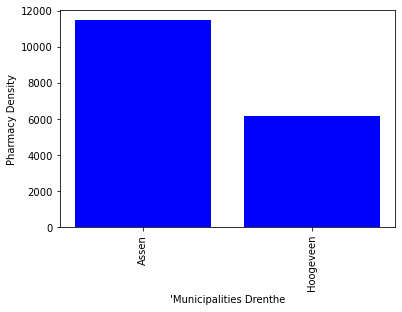

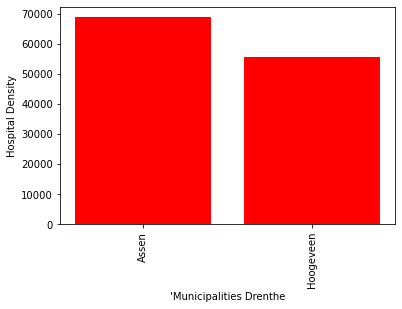

,Municipality,Population2021,PharSum,HospSum,Pharmacy Density,Hospital Density
0,Assen,68833,6,1,11472,68833
1,Hoogeveen,55600,9,1,6177,55600


In [35]:
plt.bar('Municipality','Pharmacy Density', data = drenthe , color = "blue")
plt.xlabel("'Municipalities Drenthe")
plt.xticks(rotation = 90)
plt.ylabel('Pharmacy Density')
plt.show()

plt.bar('Municipality','Hospital Density', data = drenthe , color = "red")
plt.xlabel("'Municipalities Drenthe")
plt.xticks(rotation = 90)
plt.ylabel('Hospital Density')
plt.show()

drenthe

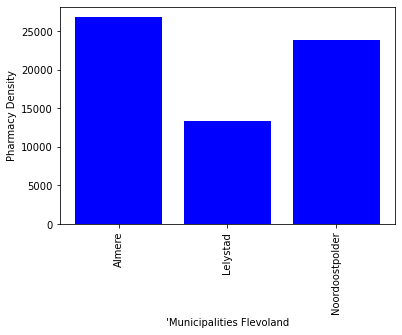

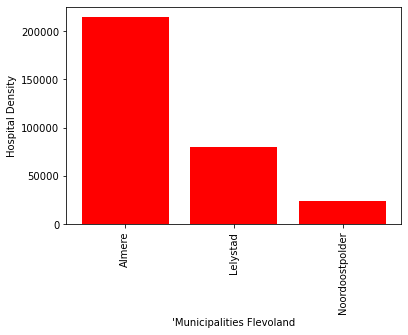

,Municipality,Population2021,PharSum,HospSum,Pharmacy Density,Hospital Density
0,Almere,214757,8,1,26844,214757
1,Lelystad,79769,6,1,13294,79769
2,Noordoostpolder,47610,2,2,23805,23805


In [36]:
plt.bar('Municipality','Pharmacy Density', data = flevoland, color = "blue")
plt.xlabel("'Municipalities Flevoland")
plt.xticks(rotation = 90)
plt.ylabel('Pharmacy Density')
plt.show()

plt.bar('Municipality','Hospital Density', data = flevoland, color = "red")
plt.xlabel("'Municipalities Flevoland")
plt.xticks(rotation = 90)
plt.ylabel('Hospital Density')
plt.show()

flevoland

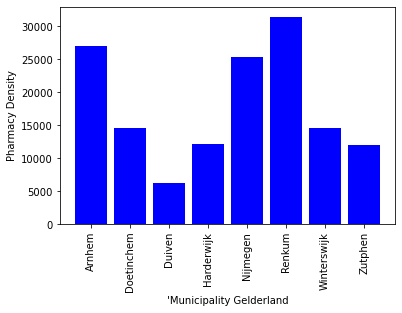

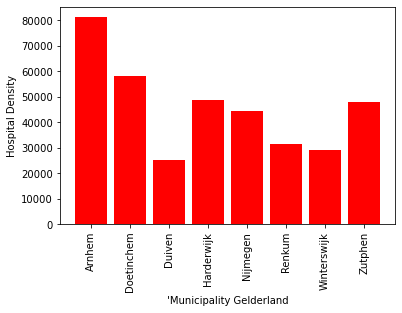

,Municipality,Population2021,PharSum,HospSum,Pharmacy Density,Hospital Density
0,Arnhem,162477,6,2,27079,81238
1,Doetinchem,58263,4,1,14565,58263
2,Duiven,25067,4,1,6266,25067
3,Harderwijk,48722,4,1,12180,48722
4,Nijmegen,177321,7,4,25331,44330
5,Renkum,31412,1,1,31412,31412
6,Winterswijk,29041,2,1,14520,29041
7,Zutphen,48099,4,1,12024,48099


In [37]:
plt.bar('Municipality','Pharmacy Density', data = gelderland, color = "blue")
plt.xlabel("'Municipality Gelderland")
plt.xticks(rotation = 90)
plt.ylabel('Pharmacy Density')
plt.show()

plt.bar('Municipality','Hospital Density', data = gelderland, color = "red")
plt.xlabel("'Municipality Gelderland")
plt.xticks(rotation = 90)
plt.ylabel('Hospital Density')
plt.show()

gelderland

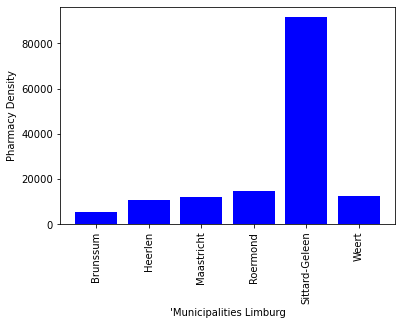

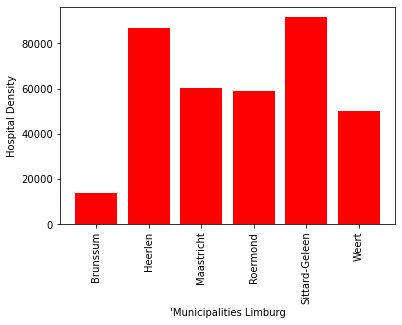

,Municipality,Population2021,PharSum,HospSum,Pharmacy Density,Hospital Density
0,Brunssum,27682,5,2,5536,13841
1,Heerlen,86935,8,1,10866,86935
2,Maastricht,120182,10,2,12018,60091
3,Roermond,58806,4,1,14701,58806
4,Sittard-Geleen,91724,1,1,91724,91724
5,Weert,50017,4,1,12504,50017


In [38]:
plt.bar('Municipality','Pharmacy Density', data = limburg, color = "blue")
plt.xlabel("'Municipalities Limburg")
plt.xticks(rotation = 90)
plt.ylabel('Pharmacy Density')
plt.show()

plt.bar('Municipality','Hospital Density', data = limburg, color = "red")
plt.xlabel("'Municipalities Limburg")
plt.xticks(rotation = 90)
plt.ylabel('Hospital Density')
plt.show()

limburg

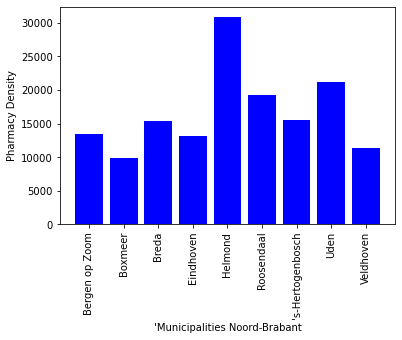

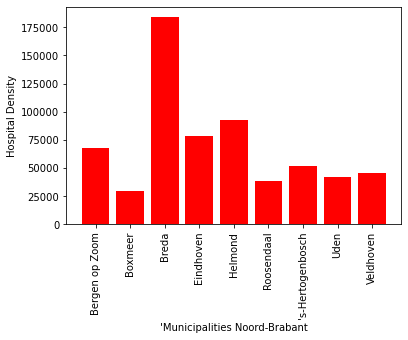

,Municipality,Population2021,PharSum,HospSum,Pharmacy Density,Hospital Density
0,Bergen op Zoom,67513,5,1,13502,67513
1,Boxmeer,29599,3,1,9866,29599
2,Breda,184077,12,1,15339,184077
3,Eindhoven,235707,18,3,13094,78569
4,Helmond,92624,3,1,30874,92624
5,Roosendaal,77201,4,2,19300,38600
6,'s-Hertogenbosch,155496,10,3,15549,51832
7,Uden,42293,2,1,21146,42293
8,Veldhoven,45500,4,1,11375,45500


In [39]:
plt.bar('Municipality','Pharmacy Density', data = n_brabant, color = "blue")
plt.xlabel("'Municipalities Noord-Brabant")
plt.xticks(rotation = 90)
plt.ylabel('Pharmacy Density')
plt.show()

plt.bar('Municipality','Hospital Density', data = n_brabant, color = "red")
plt.xlabel("'Municipalities Noord-Brabant")
plt.xticks(rotation = 90)
plt.ylabel('Hospital Density')
plt.show()

n_brabant

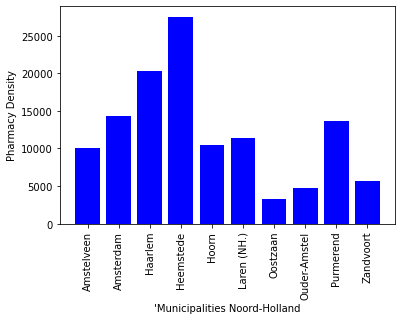

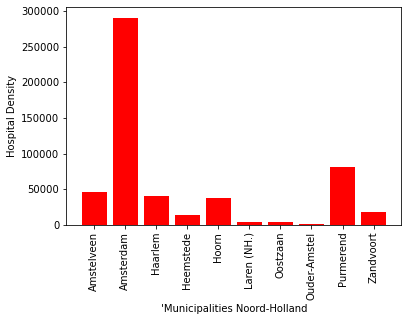

,Municipality,Population2021,PharSum,HospSum,Pharmacy Density,Hospital Density
0,Amstelveen,90746,9,2,10082,45373
1,Amsterdam,872922,61,3,14310,290974
2,Haarlem,162549,8,4,20318,40637
3,Heemstede,27531,1,2,27531,13765
4,Hoorn,73602,7,2,10514,36801
5,Laren (NH.),11399,1,3,11399,3799
6,Oostzaan,9686,3,3,3228,3228
7,Ouder-Amstel,14127,3,11,4709,1284
8,Purmerend,81676,6,1,13612,81676
9,Zandvoort,17165,3,1,5721,17165


In [40]:
plt.bar('Municipality','Pharmacy Density', data = n_holland, color = "blue")
plt.xlabel("'Municipalities Noord-Holland")
plt.xticks(rotation = 90)
plt.ylabel('Pharmacy Density')
plt.show()

plt.bar('Municipality','Hospital Density', data = n_holland, color = "red")
plt.xlabel("'Municipalities Noord-Holland")
plt.xticks(rotation = 90)
plt.ylabel('Hospital Density')
plt.show()

n_holland

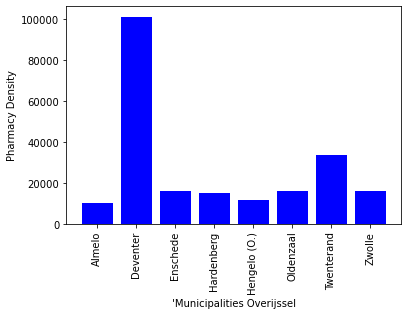

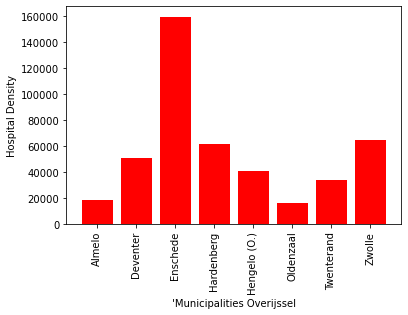

,Municipality,Population2021,PharSum,HospSum,Pharmacy Density,Hospital Density
0,Almelo,73140,7,4,10448,18285
1,Deventer,101227,1,2,101227,50613
2,Enschede,159703,10,1,15970,159703
3,Hardenberg,61346,4,1,15336,61346
4,Hengelo (O.),81057,7,2,11579,40528
5,Oldenzaal,31702,2,2,15851,15851
6,Twenterand,33705,1,1,33705,33705
7,Zwolle,129827,8,2,16228,64913


In [41]:
plt.bar('Municipality','Pharmacy Density', data = overijssel, color = "blue")
plt.xlabel("'Municipalities Overijssel")
plt.xticks(rotation = 90)
plt.ylabel('Pharmacy Density')
plt.show()

plt.bar('Municipality','Hospital Density', data = overijssel, color = "red")
plt.xlabel("'Municipalities Overijssel")
plt.xticks(rotation = 90)
plt.ylabel('Hospital Density')
plt.show()

overijssel

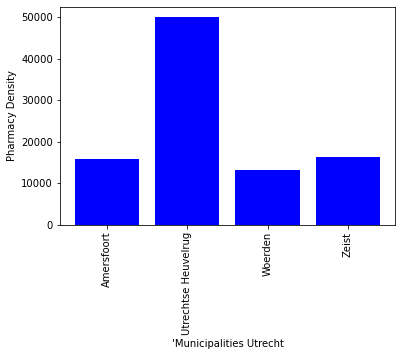

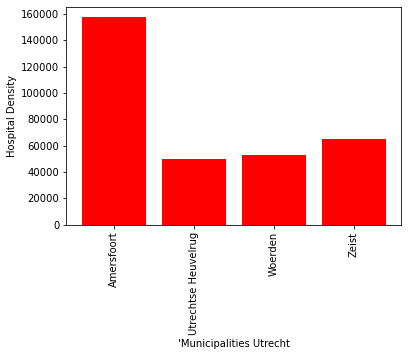

,Municipality,Population2021,PharSum,HospSum,Pharmacy Density,Hospital Density
0,Amersfoort,157438,10,1,15743,157438
1,Utrechtse Heuvelrug,49931,1,1,49931,49931
2,Woerden,52696,4,1,13174,52696
3,Zeist,65057,4,1,16264,65057


In [42]:
plt.bar('Municipality','Pharmacy Density', data = utrecht, color = "blue")
plt.xlabel("'Municipalities Utrecht")
plt.xticks(rotation = 90)
plt.ylabel('Pharmacy Density')
plt.show()

plt.bar('Municipality','Hospital Density', data = utrecht, color = "red")
plt.xlabel("'Municipalities Utrecht")
plt.xticks(rotation = 90)
plt.ylabel('Hospital Density')
plt.show()

utrecht

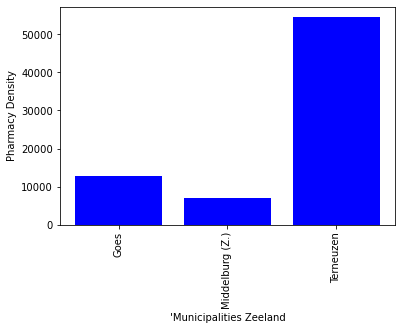

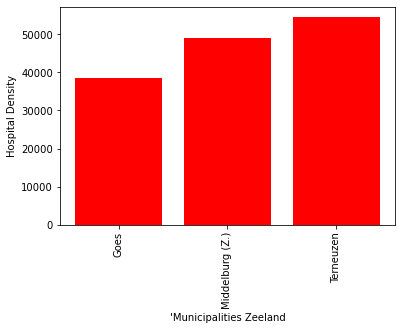

,Municipality,Population2021,PharSum,HospSum,Pharmacy Density,Hospital Density
0,Goes,38594,3,1,12864,38594
1,Middelburg (Z.),48977,7,1,6996,48977
2,Terneuzen,54467,1,1,54467,54467


In [43]:
plt.bar('Municipality','Pharmacy Density', data = zeeland, color = "blue")
plt.xlabel("'Municipalities Zeeland")
plt.xticks(rotation = 90)
plt.ylabel('Pharmacy Density')
plt.show()

plt.bar('Municipality','Hospital Density', data = zeeland, color = "red")
plt.xlabel("'Municipalities Zeeland")
plt.xticks(rotation = 90)
plt.ylabel('Hospital Density')
plt.show()

zeeland

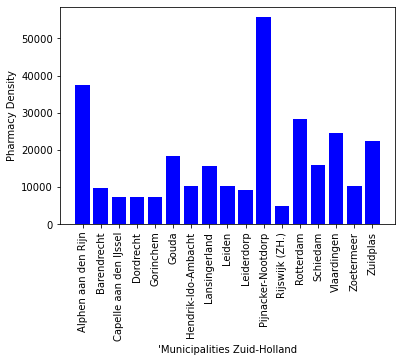

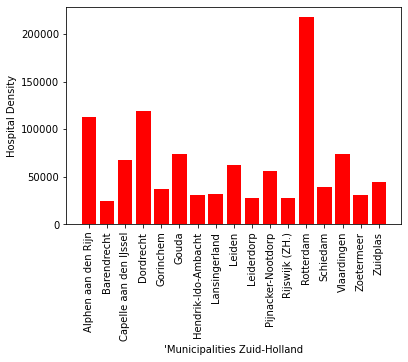

,Municipality,Population2021,PharSum,HospSum,Pharmacy Density,Hospital Density
0,Alphen aan den Rijn,112580,3,1,37526,112580
1,Barendrecht,48637,5,2,9727,24318
2,Capelle aan den IJssel,67315,9,1,7479,67315
3,Dordrecht,119111,16,1,7444,119111
4,Gorinchem,37416,5,1,7483,37416
5,Gouda,73678,4,1,18419,73678
6,Hendrik-Ido-Ambacht,31247,3,1,10415,31247
7,Lansingerland,63338,4,2,15834,31669
8,Leiden,124077,12,2,10339,62038
9,Leiderdorp,27385,3,1,9128,27385


In [44]:
plt.bar('Municipality','Pharmacy Density', data = z_holland, color = "blue")
plt.xlabel("'Municipalities Zuid-Holland")
plt.xticks(rotation = 90)
plt.ylabel('Pharmacy Density')
plt.show()

plt.bar('Municipality','Hospital Density', data = z_holland, color = "red")
plt.xlabel("'Municipalities Zuid-Holland")
plt.xticks(rotation = 90)
plt.ylabel('Hospital Density')
plt.show()

z_holland